## Predicting Accuracy on MSIT Data using Tensorflow

We will be using the famous MNIST data set of [handwritten digits](http://yann.lecun.com/exdb/mnist/).

The images which we will be working with are black and white images of size 28 x 28 pixels, or 784 pixels total. Our features will be the pixel values for each pixel. Either the pixel is "white" (blank with a 0), or there is some pixel value.

We will try to correctly predict what number is written down based solely on the image data in the form of an array. This type of problem (Image Recognition) is a great use case for Deep Learning Methods!

This data is to Deep Learning what the iris data set is to typical machine learning algorithms.


### Import Data Set

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Exploration

In [18]:
mnist.train.images

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001EC6CD50CC0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001EC734F09E8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001EC734F0A20>)


In [5]:
mnist.train.images[2].shape

(784,)

In [7]:
# Re-shaping this vector in [28,28] vector i.e 28*28 = 784 
mnist.train.images[2].reshape(28,28)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

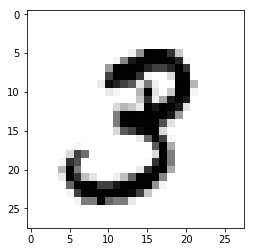

In [16]:
# We can visualize this image of any particular point.
sample_image = mnist.train.images[1].reshape(28,28)
plt.imshow(sample_image, cmap = 'Greys')

In [19]:
# Verify the actual index value of this image
mnist.train.labels[1]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

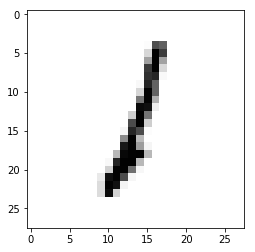

In [21]:
sample_image = mnist.train.images[123].reshape(28,28)
plt.imshow(sample_image, cmap = 'Greys')

In [22]:
mnist.train.labels[123]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [23]:
mnist.train.num_examples

55000

In [24]:
mnist.test.num_examples

10000

In [25]:
mnist.validation.num_examples

5000

So, there are 55,000 training data points, 10,000 test data points and 5000 validation data sets in this dataset

### Create the Model
We will have our equation in form of y = Wx + b,

where, W is the weight

      b is the bais

In [27]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [28]:
# 10 because 0-9 possible numbers
W = tf.Variable(tf.zeros([784,10]))

In [29]:
b = tf.Variable(tf.zeros([10]))

In [31]:
# Creating a Graph
y = tf.matmul(x,W) + b

In [52]:
y_true = tf.placeholder(tf.float32,shape = [None,10])

#### Loss and Optization Function

In [53]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [89]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [90]:
train = optimizer.minimize(loss)

### Creating a Session

In [91]:
init = tf.global_variables_initializer()

In [93]:
with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    for step in range(1000):
        
        batch_x , batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
    # Test the Train Model
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print('Accuracy: ',sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))    
        

Accuracy:  0.9127


In [94]:
with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    for step in range(10000):
        
        batch_x , batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
    # Test the Train Model
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print('Accuracy: ',sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels})) 

Accuracy:  0.925


In [95]:
with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    for step in range(20000):
        
        batch_x , batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
    # Test the Train Model
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print('Accuracy: ',sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels})) 

Accuracy:  0.9249


So, the best Accuracy tha we are getting here with basic tensorflow approch is around 92.5%